In [1]:
import numpy as np
import math
import pandas as pd
from landscape_analysis import produce_hypergraph_plot


def bitarr_to_int(bitarr):
    val = 0
    for bit in bitarr:
        val <<= 1
        val |= bit
    return val

In [2]:
def plot_file(file_name):
    df = pd.read_csv(f"../lookup_tables/{file_name}.csv")
    genotype_length = len(str(df["features"].iloc[0]))
    for i, val in enumerate(df["features"]):
        if len(str(val)) > genotype_length:
            genotype_length = len(str(val))

    for i, val in enumerate(df["features"]):
        if len(str(val)) < genotype_length:
            df.loc[i, "features"] = "0"*(genotype_length - len(str(val))) +  str(df["features"].iloc[i])

    lookup_table = {'0'*genotype_length: math.inf}

    for i, val in enumerate(df["features"]):
        lookup_table[str(val)] = df["loss"].iloc[i]

    optima = min(lookup_table.values())
    produce_hypergraph_plot(lookup_table, genotype_length, optima, show_optima=True, output=file_name)

/var/folders/h0/88jjy3r533d1nj8s86kss9b80000gn/T/ipykernel_78225/1663858632.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '00111101101' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, "features"] = "0"*(genotype_length - len(str(val))) +  str(df["features"].iloc[i])
/var/folders/h0/88jjy3r533d1nj8s86kss9b80000gn/T/ipykernel_78225/1663858632.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '01111010111' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, "features"] = "0"*(genotype_length - len(str(val))) +  str(df["features"].iloc[i])
/var/folders/h0/88jjy3r533d1nj8s86kss9b80000gn/T/ipykernel_78225/1663858632.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future 

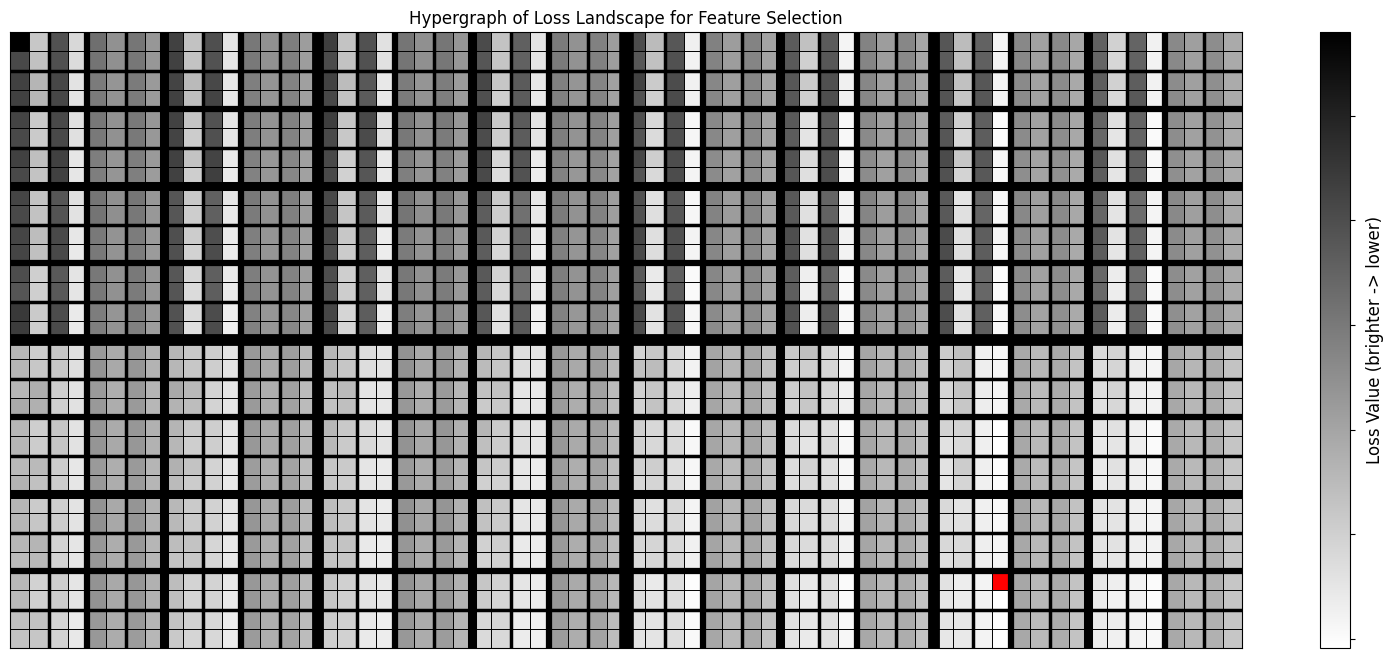

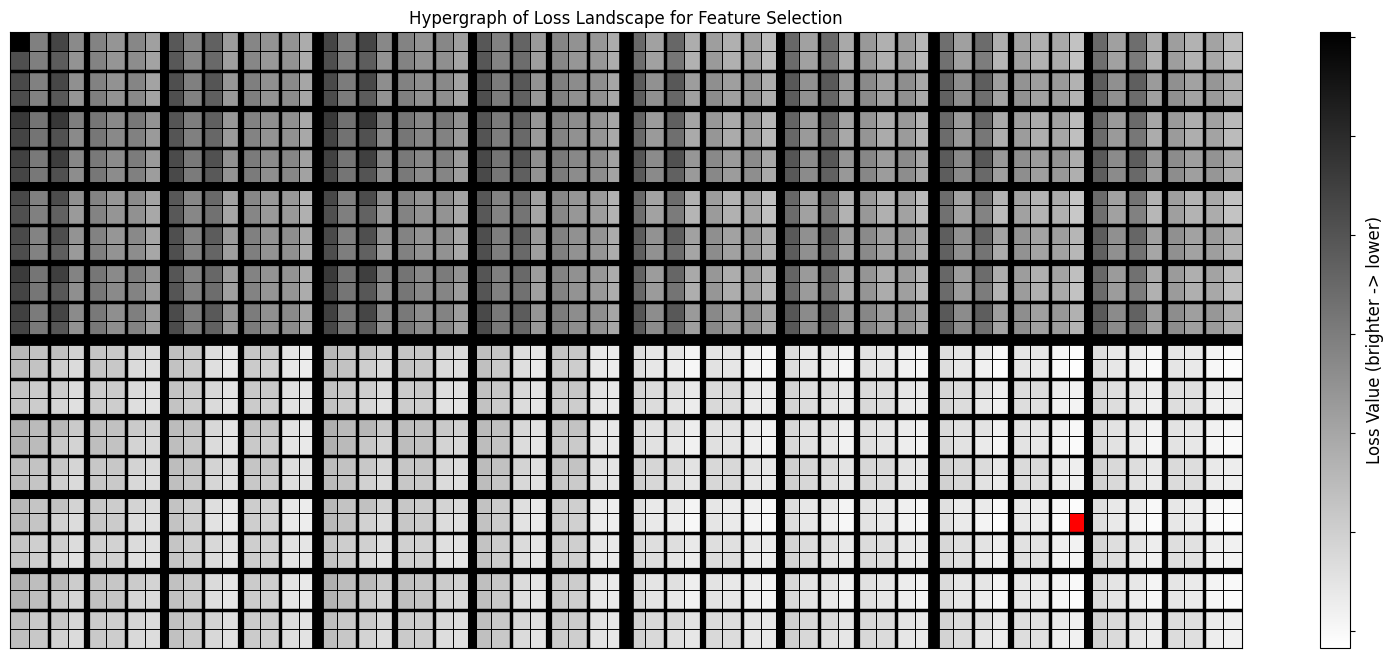

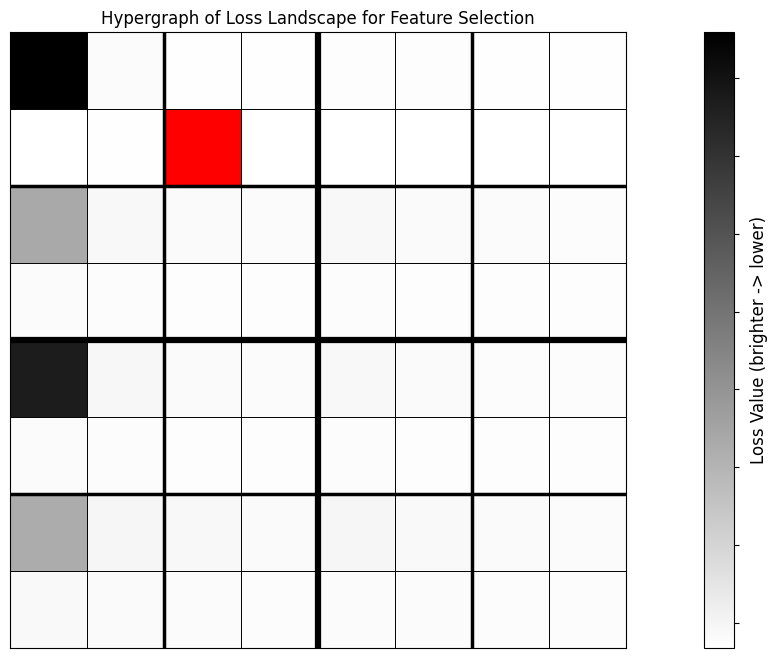

In [3]:
file_names = ["svm_feature", "log_reg_feature", "ensemble_feature"]
for file in file_names:
    plot_file(file)